In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [198]:
import os
path = os.getcwd() + '/data/mnist_train.csv'
data = pd.read_csv(path, header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [199]:
cols = data.shape[1]
print (cols)

785


In [200]:
y= np.array(data.iloc[:,:1])
x = np.array(data.iloc[:,1:cols])

In [201]:
x.shape, y.shape

((450, 784), (450, 1))

In [202]:
###Finding unique classes
np.unique(y)


array([0, 1, 2, 3], dtype=int64)

In [203]:
rows = x.shape[0]

In [204]:
x= np.insert(x,0, values = np.ones(rows),axis = 1)  #inserting ones
x.shape


(450, 785)

In [205]:
params = x.shape[1]# finding no.of features
all_theta = np.zeros((4, params)) #4 is no.of labels
#all_theta = np.matrix(all_matrix)
all_theta.shape

(4, 785)

In [206]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [207]:
def computeCost(theta,x,y):
    theta = np.matrix(theta)
    x= np.matrix(x)
    y= np.matrix(y)
    
    #(-y*log(z))--->when expected output (y)=1
    first = np.multiply(-y, np.log(sigmoid(x*theta.T)))
    
    #else case for y =0
    second = np.multiply((1-y),np.log(1- sigmoid(x*theta.T)))
    
    cost = np.sum(first-second)
    cost = cost/(2*len(x))
    
    return cost

cost= computeCost(all_theta, x, y)
print("cost = {}".format(cost))


cost = 1.3862943611198904


In [208]:
learning_rate=1
def gradient(theta, x, y):
    
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    
    parameters = int(theta.shape[1])
    
    error = sigmoid(x * theta.T) - y
    grad = ((x.T * error) / len(x))
    grad = grad * learning_rate
    return grad

In [209]:
from scipy.optimize import minimize
def one_vs_all(x, y, classes, new_theta):
    params = x.shape[1]
    rows = x.shape[0]
      
    for i in range(0, classes):
        theta = np.zeros(params)
        
        theta = new_theta[i,:]
        y_i = np.array([1 if label == i else 0 for label in y]) 
        y_i = np.reshape(y_i, (rows, 1))
        
        
        # minimize the objective function  --> Gradient descent
        fmin = minimize(fun=computeCost, x0=theta, args=(x, y_i), method='TNC', jac=gradient)
        all_theta[i,:] = fmin.x
    
    return all_theta

In [210]:
classes = 4
new_theta = one_vs_all(x, y, classes, all_theta)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


In [211]:
print(new_theta)

[[-3.91023877e-02  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.02031878e-01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.22373410e-04  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.79871148e-03  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [212]:
computeCost(new_theta, x, y)

34.54691655754845

In [213]:
def predict_all(x,theta):
    x=np.matrix(x)
    theta = np.matrix(theta)

    h= sigmoid(x*theta.T)

    h_argmax = np.argmax(h, axis =1)

    return h_argmax

In [214]:
y_pred = predict_all(x, new_theta)

In [215]:
correct = [1 if a == b else 0 for (a,b) in zip (y_pred, y)]
print (correct)
accuracy = (sum(map(int, correct))/ float(len(correct)))
print ("Training Data = {} %".format(accuracy*100))


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

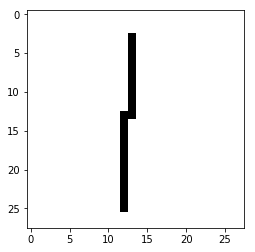

In [216]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[:,:,:3], [0.299, 0.587, 0.114])

img = mpimg.imread('data/Pic.png')     
gray = rgb2gray(img)

plt.imshow(img, cmap = plt.get_cmap('gray'))

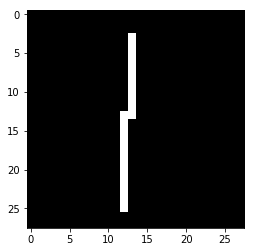

In [217]:
grarray = np.asarray(gray)
bw = (grarray < (grarray.mean()))*255
plt.imshow(np.reshape(bw, (28,28)), cmap=plt.cm.gray)

In [218]:
bw= bw.ravel()
bw= bw.reshape(1,-1)
brows=bw.shape[0]
bw = np.insert(bw, 0, values=np.ones(brows), axis=1)

In [219]:
pred = predict_all(bw, new_theta)
print(pred)

[[1]]
